In [1]:
import spacy
import pandas as pd
from spacytextblob.spacytextblob import SpacyTextBlob

## Sentiment Analysis
5/11/2022
Running down several blog articles in order to judge their sentiment

Schema for test is: title, content, polarity, subjectivity

In [2]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

In [7]:
data_frame = pd.read_csv('./data/dataset.csv')

In [8]:
data_frame.describe()

,word_count
count,210.000000
mean,1329.595238
std,1224.730777
min,2.000000
25%,470.250000
50%,1031.000000
75%,1926.000000
max,6171.000000


In [21]:
def sentiment_analysis(value):
    """Runs the NLP model over each row's content field to interpet the article sentiment.

    Input - pd.DataFrame.row

    Output
          - article polarity: Float
          - article subjectivity: Float  
    """
    if value['content']:
        text_data = value['content']
        doc = nlp(text_data)
        return pd.Series([doc._.blob.polarity, doc._.blob.subjectivity, doc._.blob.sentiment_assessments.assessments])
    else:
        return "N/A", "N/A"

In [22]:
data_frame[['polarity','subjectivity','textblob assessments']] = data_frame.apply(lambda row,: sentiment_analysis(row), axis=1)

In [ ]:
data_frame.loc[data_frame['polarity'] <= 0.000000].head(20)

### FineGrain look at the content

In [53]:
data_frame.iloc[133]

title                                      Nethack Reinforcement Learning
content                   If you’re a fan of old 1980’s games, then yo...
word_count                                                            581
polarity                                                        -0.049279
subjectivity                                                     0.412849
textblob assessments    [([old], 0.1, 0.2, None), ([interested], 0.25,...
Name: 133, dtype: object

In [ ]:
data_frame['content'].iloc[133]

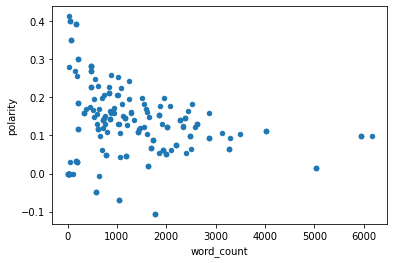

In [24]:
# examine the relationship between polarity and word_count, if any
chart = data_frame.plot(kind='scatter',x='word_count',y='polarity')

In [27]:
# getting more information on the range found
maxdf = data_frame[data_frame['polarity']==data_frame['polarity'].max()]
mindf = data_frame[data_frame['polarity']==data_frame['polarity'].min()]
print("The range of polarity for the given articles is: " + str(maxdf.iloc[0]['polarity'] + mindf.iloc[0]['polarity']))

The range of polarity for the given articles is: 0.3060757343015408


In [ ]:
set_of_articles = data_frame['title'].unique()
print(sorted(set_of_articles))

In [30]:
print(maxdf['textblob assessments'].values)

[list([(['new'], 0.13636363636363635, 0.45454545454545453, None), (['unprecedented'], 0.6, 0.9, None), (['more'], 0.5, 0.5, None)])]


In [32]:
print(maxdf['word_count'].values)

[31]
